# The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

# Imports

In [1]:
# Data manupulation and analysis
import pandas as pd
import numpy as np
# import pycaret
# import klib
# import dtale
# from pandas_profiling import ProfileReport
# from pycaret.regression import *

# Data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy

# Sklearn preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score
import sklearn.metrics as metrics
from math import sqrt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
# Ignore Warnings
import warnings 
warnings.filterwarnings('ignore')

# Data Collection

In [2]:
train = pd.read_csv("../input/bigmart-sales-data/Train.csv")
test = pd.read_csv("../input/bigmart-sales-data/Test.csv")

In [3]:
# train = pd.read_csv('Train.csv')
# test = pd.read_csv('Test.csv')

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train.describe(include = 'all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [7]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# Missing Values Handling


<AxesSubplot:xlabel='Item_Weight'>

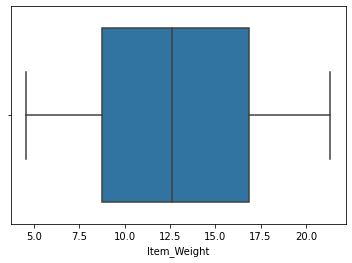

In [9]:
sns.boxplot('Item_Weight', data = train  )

<AxesSubplot:xlabel='Item_Weight'>

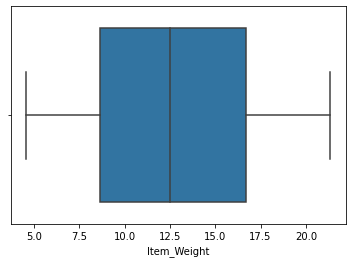

In [10]:
sns.boxplot('Item_Weight', data = test  )

In [11]:
#1. filling missing values with mean imputation

train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace = True)
test['Item_Weight'].fillna(test['Item_Weight'].mean(), inplace = True)

In [12]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
#2] since Outlet_Size is catagorical we fill the missing values with Mode imputation

train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace = True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0], inplace = True)

# Exploratory Data Analysis

In [14]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

"LF" and "low fat" are Same as "Low Fat" and "Reg" is same as "Regular". So we combine these Fat contents into one entity.

In [16]:
# # Combine fat content
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat','reg':'Regular'})
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat','reg':'Regular'})

Deriving new feature from "Outlet_Establishment_Year" by subtracting cuurrent year with the Established Year.

In [17]:
train['Years_Established'] = train['Outlet_Establishment_Year'].apply(lambda x: 2022 - x) 
test['Years_Established'] = test['Outlet_Establishment_Year'].apply(lambda x: 2022 - x)

In [18]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

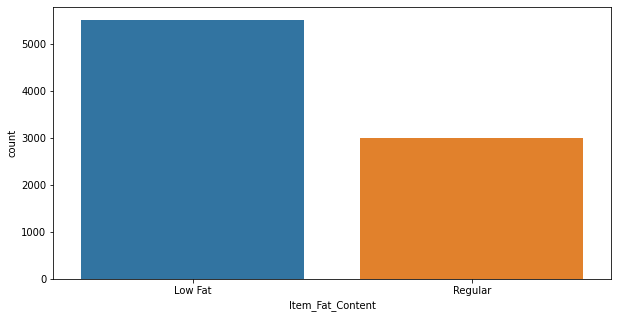

In [19]:
# 1] Item_Fat_Content 
plt.figure(figsize = (10,5))
sns.countplot('Item_Fat_Content', data = train)

Observation:
Low Fat Items are more sold

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

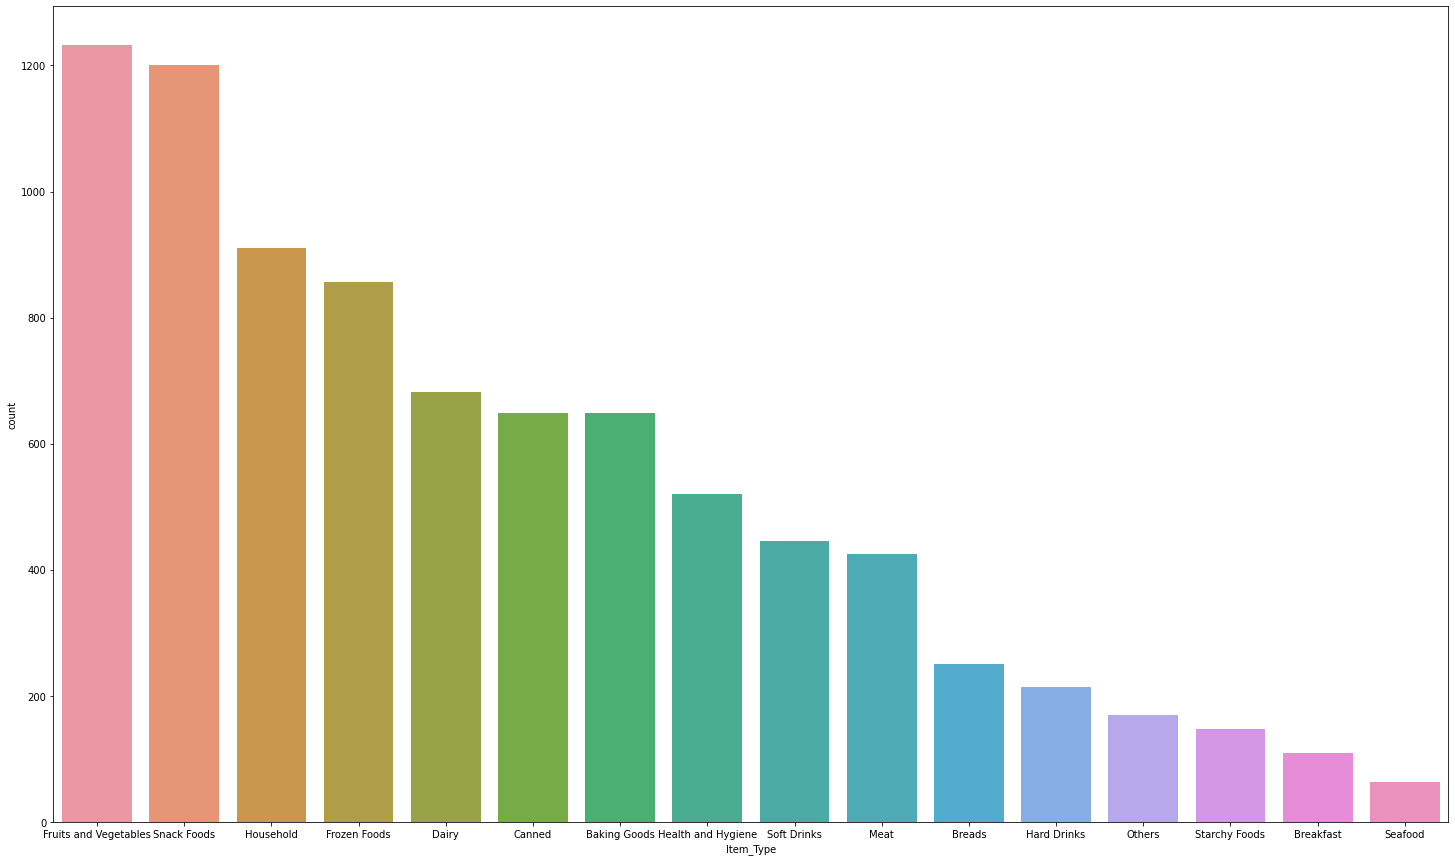

In [20]:
# 2] Item_Fat_Content 
# train['Item_Type'].value_counts()
plt.figure(figsize = (25,15))
sns.countplot('Item_Type', data = train,order = train['Item_Type'].value_counts().index)

Observation: Fruits/Vegetables and Snack Foods are the most purchased item while seafood is the least 

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

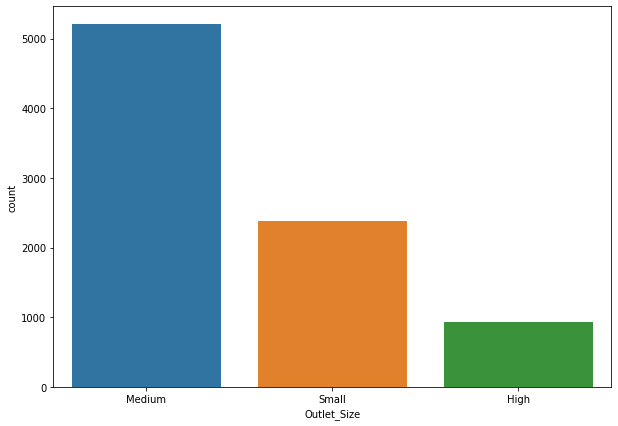

In [21]:
# 3] Outlet_Size 
plt.figure(figsize = (10,7))
sns.countplot('Outlet_Size', data = train,order = train['Outlet_Size'].value_counts().index)

Observation: There are more Medium sized Outlets while the High sized outlets are less

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

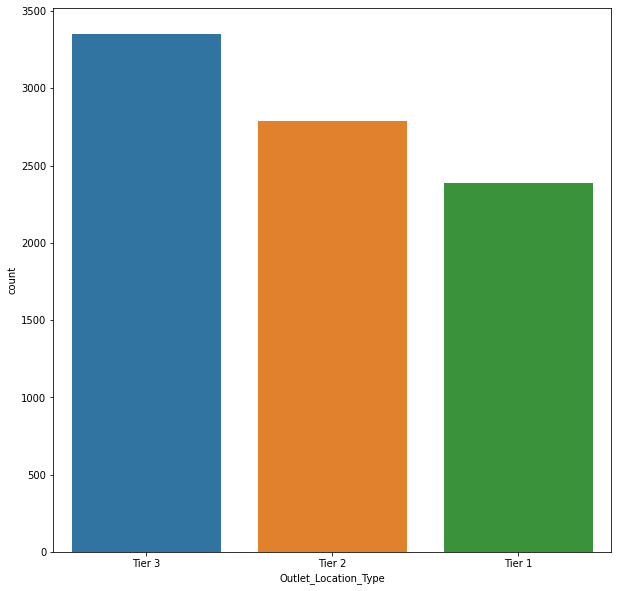

In [22]:
# 3] Outlet_Location_Type 
plt.figure(figsize = (10,10))
sns.countplot('Outlet_Location_Type', data = train, order = train['Outlet_Location_Type'].value_counts().index )
# train['Outlet_Location_Type'].value_counts()

Observation: There are more stores at tier 3 Cities

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

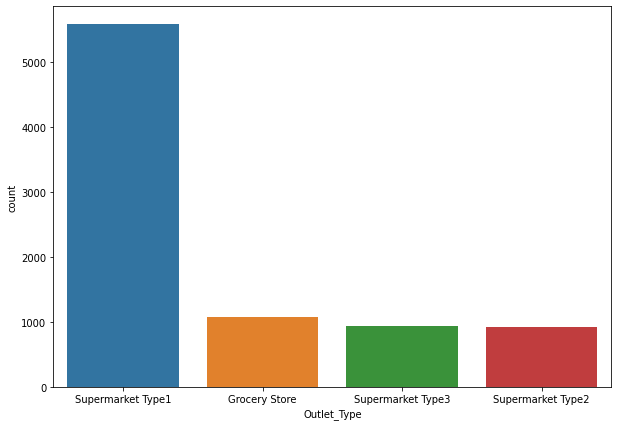

In [23]:
# 3] Outlet_Type 
plt.figure(figsize = (10,7))
sns.countplot('Outlet_Type', data = train, order = train['Outlet_Type'].value_counts().index )

Observation: There are more number of 'Supermarket Type 1' than any other Outlet types

<AxesSubplot:xlabel='Years_Established', ylabel='count'>

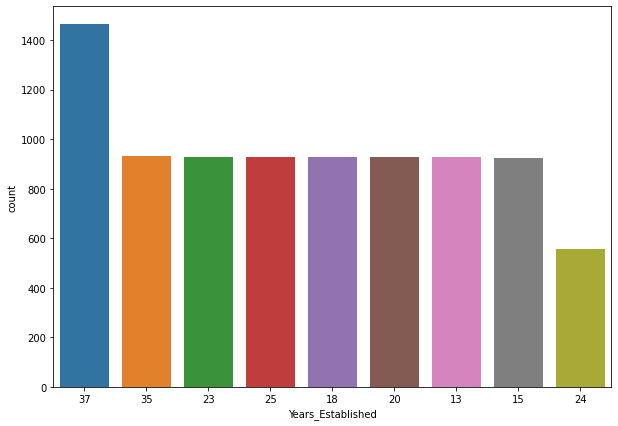

In [24]:
# 4] Years_Established 
plt.figure(figsize = (10,7))
sns.countplot('Years_Established', data = train, order = train['Years_Established'].value_counts().index )

Observation:The Outlets are more of established and running from 37 years.


In [25]:
# Bivariate Analysis

In [26]:
train.head()    

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

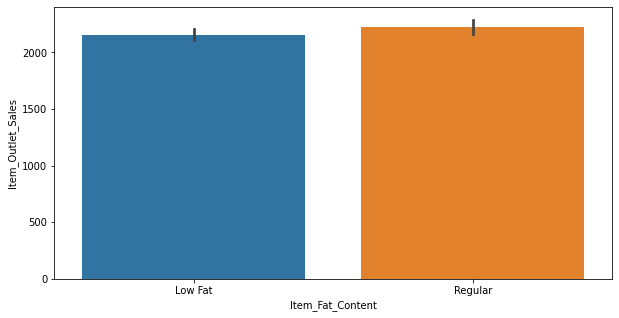

In [27]:
plt.figure(figsize = (10,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales', data = train)

Observation:The Item Outles sales are high for both Low Fat and Regular Item types.

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

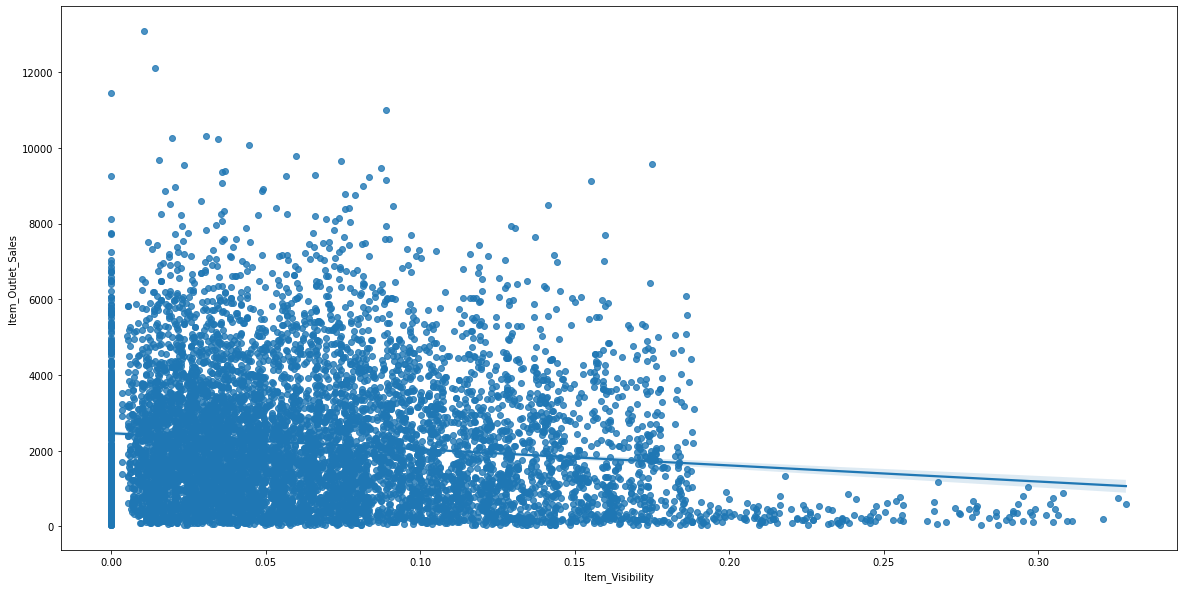

In [28]:
plt.figure(figsize = (20,10))
# plt.scatter('Item_Visibility','Item_Outlet_Sales', data = train)
sns.regplot(x=train["Item_Visibility"], y=train["Item_Outlet_Sales"])

Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

Text(0, 0.5, 'Item Visibility')

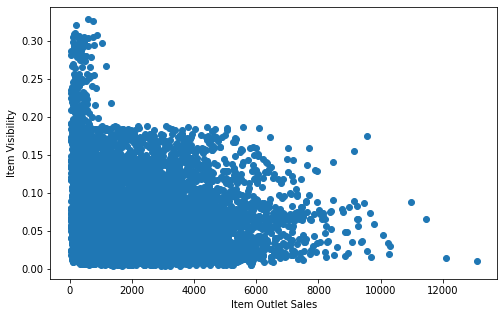

In [29]:
# Imputed mean value where there are 0 visibility
train['Item_Visibility']=train['Item_Visibility'].replace(0,train['Item_Visibility'].mean())
test['Item_Visibility']=test['Item_Visibility'].replace(0,test['Item_Visibility'].mean())
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Visibility',x='Item_Outlet_Sales',data=train)
plt.xlabel('Item Outlet Sales')
plt.ylabel('Item Visibility')


We can see that now visibility is not exactly zero and it has some value indicating that Item is rarely purchased by the customers.

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

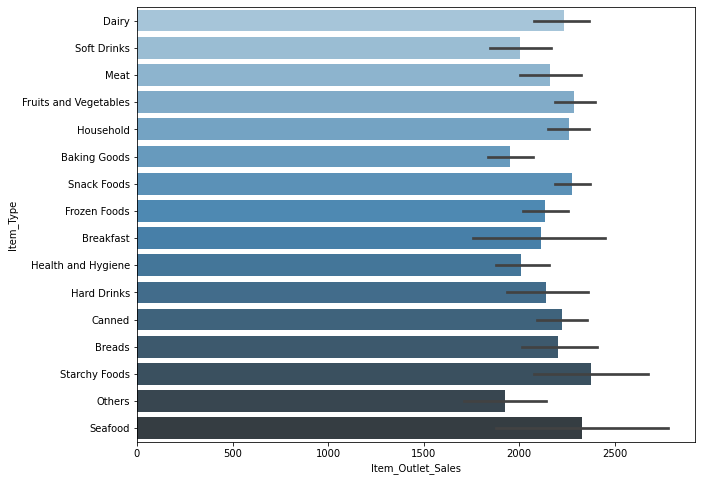

In [30]:
plt.figure(figsize = (10,8))
sns.barplot(x="Item_Outlet_Sales", y="Item_Type", data=train,palette="Blues_d")

Observations:
The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

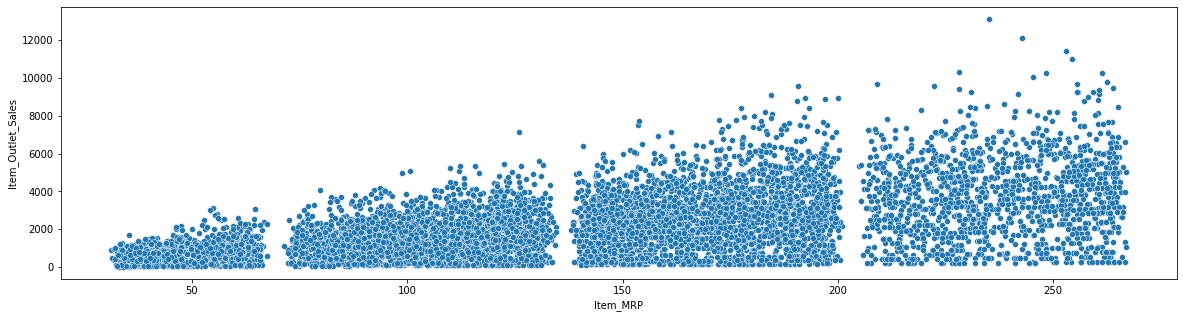

In [31]:
plt.figure(figsize =(20,5))
sns.scatterplot(x = 'Item_MRP',y = 'Item_Outlet_Sales',data = train)

Observations:
Items MRP ranging from 200-250 dollars is having high Sales

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Size'>

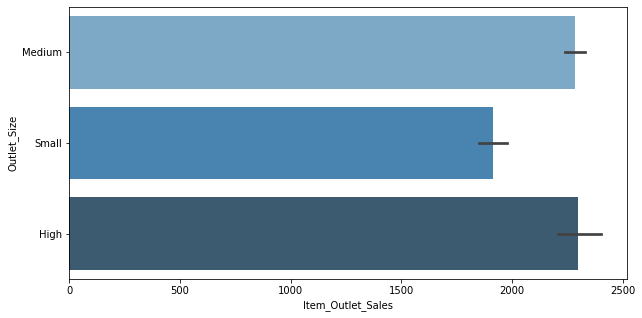

In [32]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Item_Outlet_Sales',y = 'Outlet_Size',data = train, order= train['Outlet_Size'].value_counts().index ,palette="Blues_d")

Observations:
The Outlet Sales is maximum for Medium and High sized Outlets.
The Outlets we have is Medium and may be with High size Outlets can improve the Outlet Sales.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

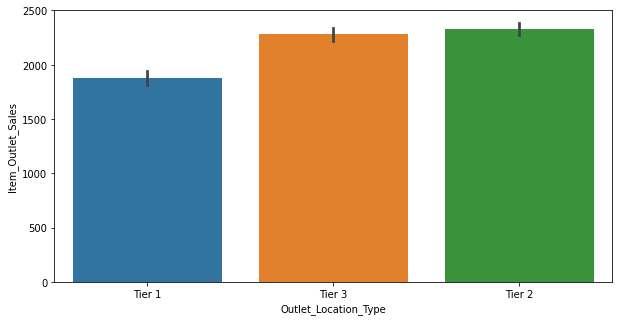

In [33]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Outlet_Location_Type',y = 'Item_Outlet_Sales',data = train )

Observations:
The Outlet Sales tend to be high for Tier3 and Tier 2 location types but we have only Tier3 locations maximum Outlets

<AxesSubplot:xlabel='Years_Established', ylabel='Item_Outlet_Sales'>

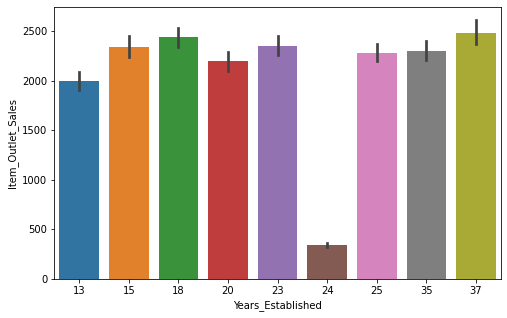

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(x='Years_Established',y='Item_Outlet_Sales',data=train)

Observation:It is quiet evident that Outlets established 35 years before is having good Sales margin.
We also have a outlet which was established before 22 years has the lowest sales margin, so established years wouldn't improve the Sales unless the products are sold according to customer's interest.

In [35]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35


In [36]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [37]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

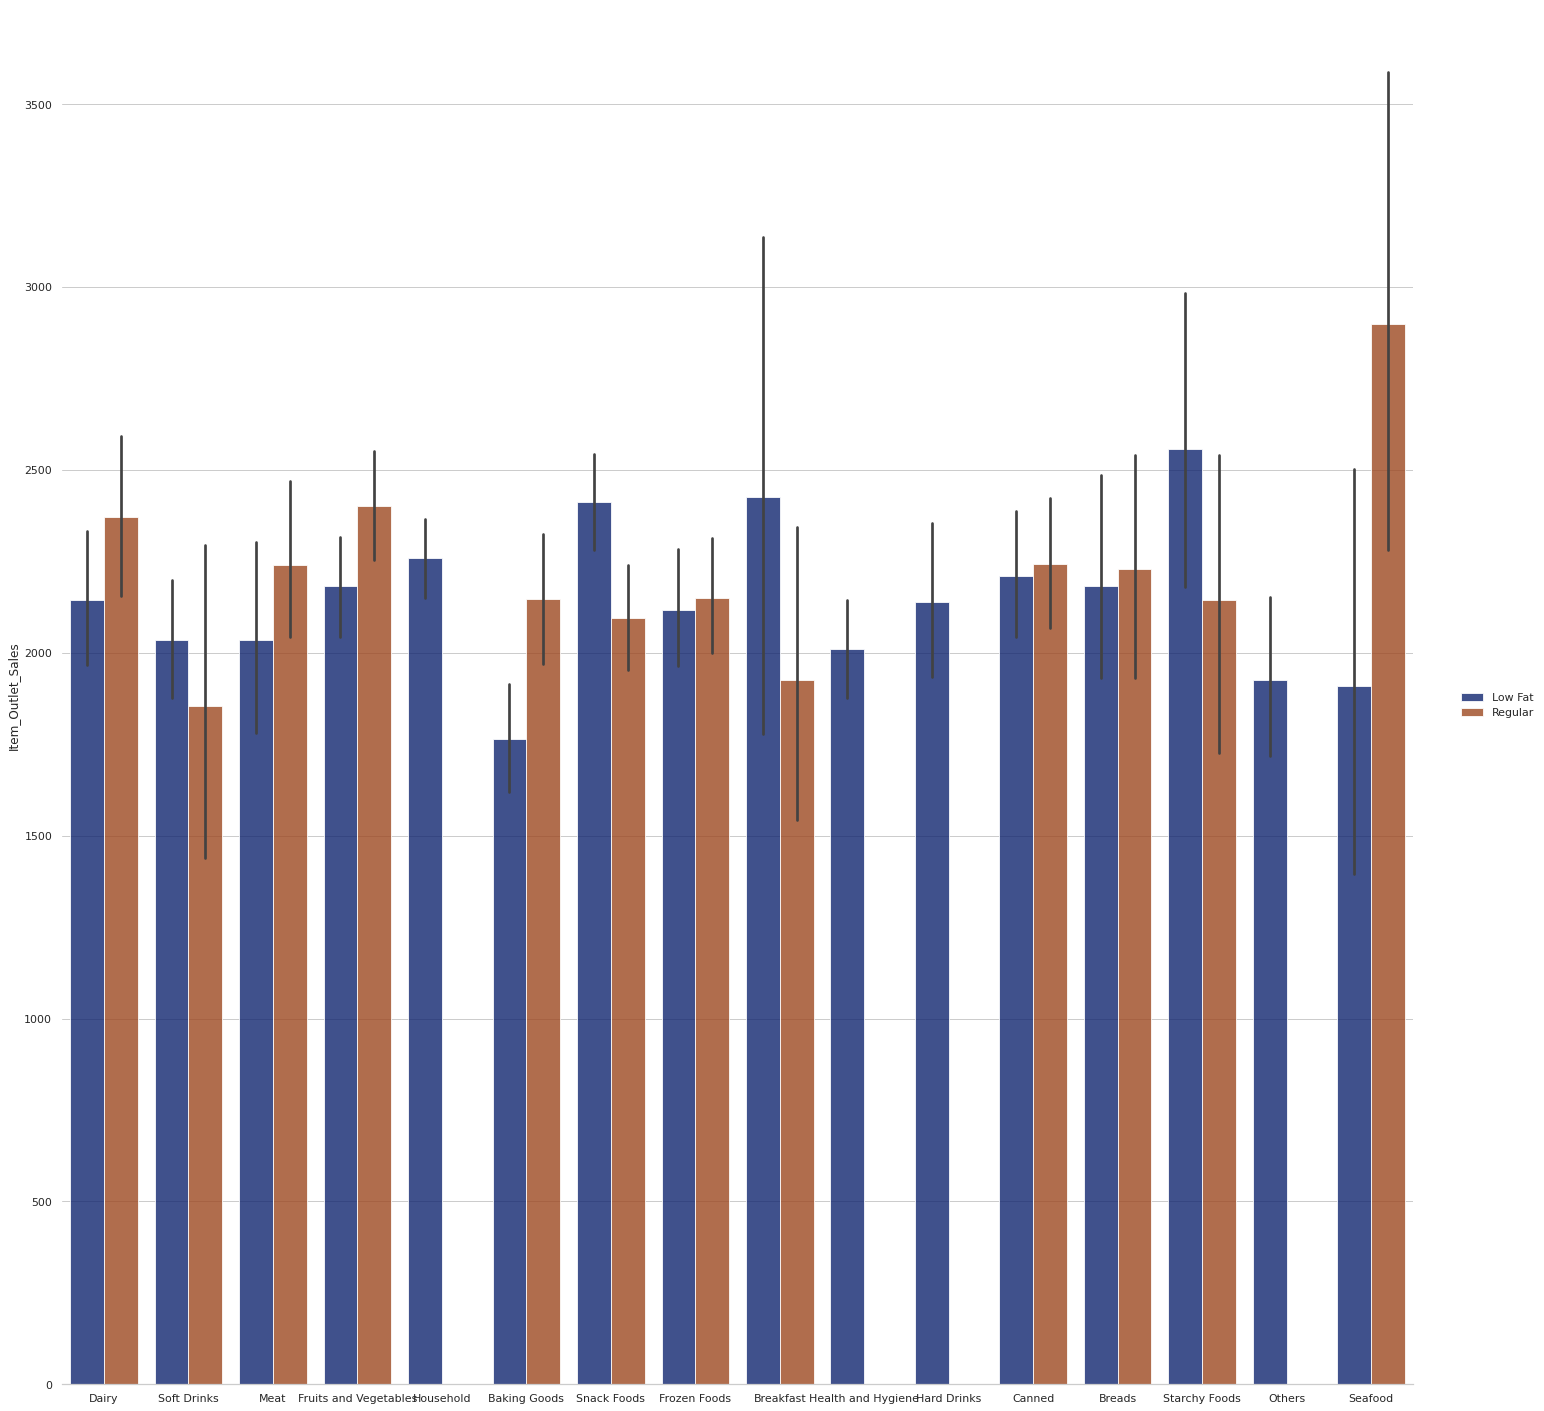

In [38]:
sns.set_theme(style="whitegrid")



# Draw a nested barplot by species and sex
g = sns.catplot(
    data=train, kind="bar",
    x="Item_Type", y="Item_Outlet_Sales", hue="Item_Fat_Content",
     palette="dark", alpha=.8, height=20
)
g.despine(left=True)
g.set_axis_labels("", "Item_Outlet_Sales")
g.legend.set_title("")

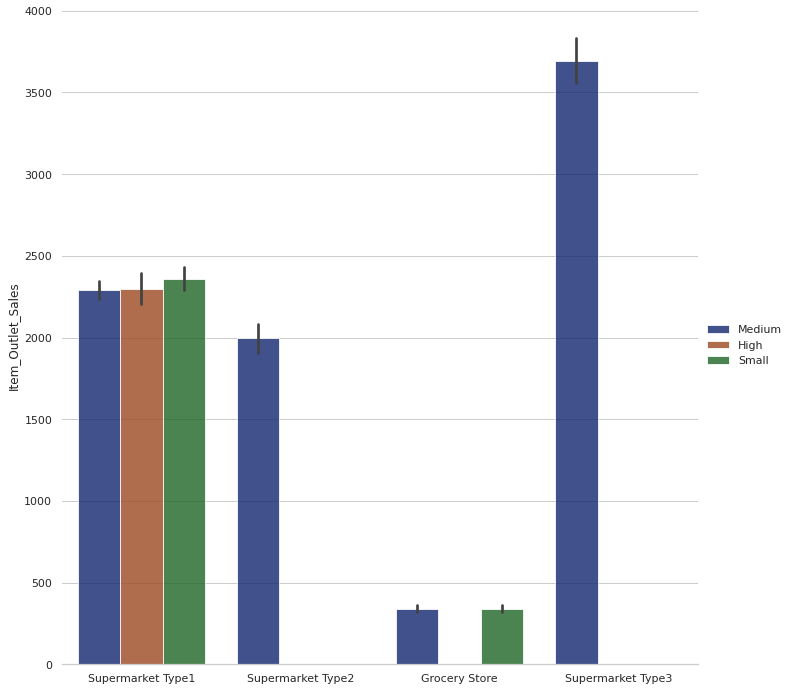

In [39]:
sns.set_theme(style="whitegrid")



# Draw a nested barplot by species and sex
g = sns.catplot(
    data=train, kind="bar",
    x="Outlet_Type", y="Item_Outlet_Sales", hue="Outlet_Size",
     palette="dark", alpha=.8, height=10
)
g.despine(left=True)
g.set_axis_labels("", "Item_Outlet_Sales")
g.legend.set_title("")

Observation : Supermarket Type3 with medium Outlet size Generates large outlet sales

# Feature Engineering

In [40]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35


Item_Identifier, Outlet_Identifier and Outlet_Establishment_Year are supposed to be dropped as they don't seem to be helping in our analysis.

In [41]:
train.drop(columns = ['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'], axis = 1, inplace = True)
test.drop(columns = ['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'], axis = 1, inplace = True)

In [42]:
train.shape, test.shape

((8523, 10), (5681, 9))

# Label Encoding

In [43]:
encoder = LabelEncoder()

In [44]:
elements = train.select_dtypes(include=['object']).columns

Converting all the above catagorial datatypes to Label encoding

In [45]:
elements

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [46]:
for i in elements:
    train[i] = encoder.fit_transform(train[i])

for elements in test:
    test[i] = encoder.fit_transform(test[i])

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   int64  
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   int64  
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           8523 non-null   int64  
 6   Outlet_Location_Type  8523 non-null   int64  
 7   Outlet_Type           8523 non-null   int64  
 8   Item_Outlet_Sales     8523 non-null   float64
 9   Years_Established     8523 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 666.0 KB


In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           5681 non-null   float64
 1   Item_Fat_Content      5681 non-null   object 
 2   Item_Visibility       5681 non-null   float64
 3   Item_Type             5681 non-null   object 
 4   Item_MRP              5681 non-null   float64
 5   Outlet_Size           5681 non-null   object 
 6   Outlet_Location_Type  5681 non-null   object 
 7   Outlet_Type           5681 non-null   int64  
 8   Years_Established     5681 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 399.6+ KB


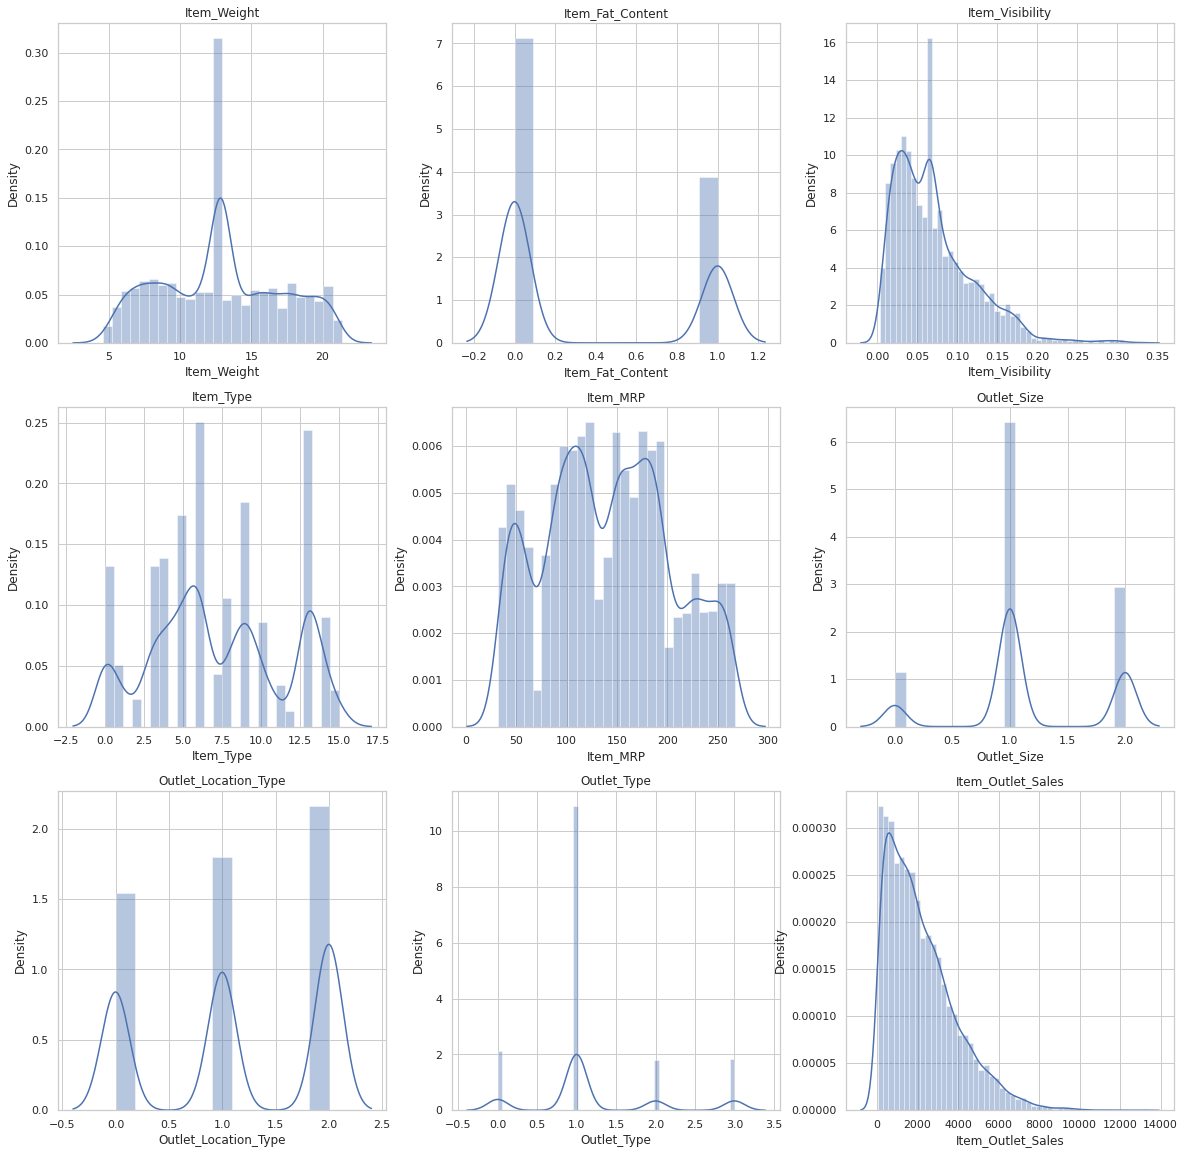

In [49]:
# Distribution of all columns

fig, axes = plt.subplots(nrows = 3, ncols = 3)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(20, 20)

for ax, col in zip(axes, train.columns):
  sns.distplot(train[col], ax = ax)
  ax.set_title(col)

# Defining X and y variable   

In [50]:
X = train.drop(['Item_Outlet_Sales'], axis = 1)
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,9.30,0,0.016047,4,249.8092,1,0,1,23
1,5.92,1,0.019278,14,48.2692,1,2,2,13
2,17.50,0,0.016760,10,141.6180,1,0,1,23
3,19.20,1,0.066132,6,182.0950,1,2,0,24
4,8.93,0,0.066132,9,53.8614,0,2,1,35


In [51]:
y = train['Item_Outlet_Sales']
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size  = 0.2, random_state = 42 )

In [53]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 9) (6818, 9) (1705, 9)


In [54]:
X.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Years_Established'],
      dtype='object')

In [55]:
features = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Years_Established']

# Model Building


# 1) Linear Regression

In [56]:
LR = LinearRegression(normalize=True)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
coef2 = pd.Series(LR.coef_,features).sort_values()

In [57]:
coef2

Item_Visibility        -1731.160326
Outlet_Location_Type    -424.013564
Outlet_Size             -351.476776
Item_Weight               -2.757464
Years_Established         -0.341879
Item_Type                  0.268020
Item_MRP                  15.621485
Item_Fat_Content          66.261527
Outlet_Type              989.669750
dtype: float64

<AxesSubplot:>

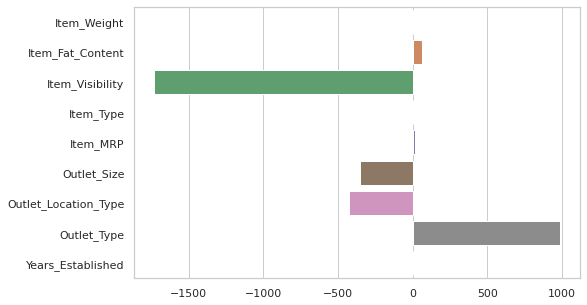

In [58]:
plt.figure(figsize=(8,5))
sns.barplot(LR.coef_,features)

# Evaluation
# R2 Score

In [59]:
r2_Linear_Regression = r2_score(y_test, y_pred)
print('R2 score of Linear regression:',r2_Linear_Regression)

R2 score of Linear regression: 0.5246196287444576


# MAE(Mean Absolute error) and MSE(Mean squared error)

In [60]:
MAE = metrics.mean_absolute_error(y_test, y_pred) 
MSE = metrics.mean_squared_error(y_test, y_pred)

In [61]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 855.324884400431
mean squared error: 1292069.6193297089


# RMSE(Root Mean Squared error)

In [62]:
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 1136.6924031283525


# 2) Random Forest Regressor

In [63]:
RF = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)

In [64]:
# Fitting the model on our trained dataset.
RF.fit(X_train,y_train)

# Making Predictions
y_pred = RF.predict(X_test)

In [65]:
coef3 = pd.Series(RF.feature_importances_, features).sort_values(ascending=False)
coef3

Item_MRP                5.533294e-01
Outlet_Type             3.832653e-01
Years_Established       6.258648e-02
Item_Visibility         3.274804e-04
Item_Weight             2.820871e-04
Outlet_Location_Type    1.287580e-04
Item_Type               7.856766e-05
Outlet_Size             1.340882e-06
Item_Fat_Content        5.995052e-07
dtype: float64

<AxesSubplot:>

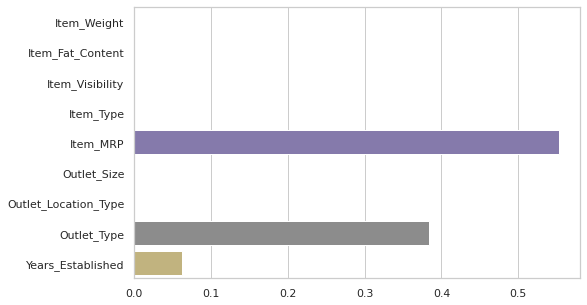

In [66]:
plt.figure(figsize=(8,5))
sns.barplot(RF.feature_importances_,features)

# 3) Lasso

In [67]:
LS = Lasso(alpha = 0.05)
#fit
LS.fit(X_train,y_train)

#predict
y_predict = LS.predict(X_test)

In [68]:
def cross_val(model_name,model,X,y,cv):
    
    scores = cross_val_score(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),2)}')

In [69]:
cross_val(LR,LinearRegression(),X,y,5)

LinearRegression(normalize=True) Scores:
0.53
0.5
0.49
0.51
0.51
Average LinearRegression(normalize=True) score: 0.51


In [70]:
cross_val(RF,RandomForestRegressor(),X,y,5)

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) Scores:
0.56
0.52
0.52
0.56
0.57
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) score: 0.55


In [71]:
cross_val(LS,Lasso(),X,y,5)

Lasso(alpha=0.05) Scores:
0.53
0.5
0.49
0.51
0.5
Average Lasso(alpha=0.05) score: 0.51


 Random forest clearly wins as the avergage score is 0.54 While Linear Regression and lasso has a score of 0.51

# HyperParameter Tuning

In [72]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train, y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.537 using {'n_estimators': 1000}
0.500 (0.008) with: {'n_estimators': 10}
0.532 (0.003) with: {'n_estimators': 100}
0.537 (0.003) with: {'n_estimators': 1000}


In [73]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [74]:
grid_search_forest.best_score_

0.5367127799918974

In [75]:
Y_pred_rf_grid=grid_search_forest.predict(X_test)

In [76]:
grid_r2 = r2_score(y_test,Y_pred_rf_grid)
print('R2 score for Grid Search: ',grid_r2*100)

R2 score for Grid Search:  57.03797382208331


In [77]:
cross_val(model,RandomForestRegressor(),X,y,5)

RandomForestRegressor() Scores:
0.56
0.52
0.52
0.56
0.56
Average RandomForestRegressor() score: 0.55


observation: Hyperperameter tuning did not drastically change the model performance so we will be using the default RandomForestRegressor as our model.

# Saving the model

In [78]:
import pickle

In [79]:
pickle.dump(RF,open('rf.pkl','wb'))

In [80]:
# 